# Generatori di numeri pseudocasuali - ```nrand48```

Esistono diversi generatori di numeri pseudocasuali basati su algoritmi che producono sequenze numeriche.

Gli algoritmi hanno diversi livelli di complessità, ma alcune caratteristiche simili:
* dipendono da un valore iniziale (*seed*)
* è *difficile* prevedere la sequenza di numeri successivi ad un valore dato
* devono ricoprire l'intervallo di possibili valori

In seguito formalizzeremo meglio le proprietà dei numeri pseudo casuali, che dovranno essere:
* tutti i numeri della sequenza dovranno avere la stessa *distribuzione di probabilità*, qui intesa semplicemente come densità di valori
* ciascun numero dovrà essere *indipendente* dai precedenti

In letteratura, queste variabili di definiscono: *indipendenti e identicamente distribuite* (iid).

Nel seguito del corso sarà più chiaro cosa significa:
* indipendenti
* distribuite secondo una certa funzione

Per ora tralasciamo questi aspetti che approfondiremo più tardi.

In genere, si preferisce partire da algoritmi che generino distribuzioni **uniformi**, e poi ottenere le distribuzioni che seguono diverse distribuzioni a partire da questi ultimi.

Qui implementiamo un algoritmo usato dalla funzione ```nrand48```.

La funzione è uno standard del sistema operativo Linux. Può essere usata in programmi nel linguaggio C e la sua <a href="https://linux.die.net/man/3/nrand48">documentazione</a> si trova online.

## La nostra implementazione di ```nrand48```
Nota: l'operatore ```%``` calcola il modulo, ossia il resto, di una divisione tra interi.
Il valore massimo ```max_rnd``` è uguale a $2^{48}$.

In [1]:
max_rnd = 0x1000000000000
def rand48(x, a = 0x5DEECE66D, c = 0xB, m=max_rnd):
    return (a*x + c) % m

Per passare da un numero intero ad un numero reale (approssimato come *floating point*) basta dividere per il valore massimo.

In [2]:
x = 1234
for i in range(20):
    x = rand48(x)
    print('{rnd_int:15d}, {rnd_float:14.12f}'.format(rnd_int=x, rnd_float=x/max_rnd))

 31115191433589, 0.110543366225
  4286564013276, 0.015228934605
231892032326071, 0.823845995250
176183444966646, 0.625929334911
173834482059465, 0.617584142260
209774565381024, 0.745268967894
213563540167467, 0.758730110446
233961497555802, 0.831198212679
193328599103837, 0.686841158540
229532858464932, 0.815464526003
246593628295135, 0.876076556349
 78986793081854, 0.280617460226
 12230336405297, 0.043450883443
 37960734576104, 0.134863620986
 15947184200659, 0.056655779448
 35151106288354, 0.124881816136
236369869098565, 0.839754467203
109497389437292, 0.389012873247
111037350785799, 0.394483914994
109141846492166, 0.387749730962


In [3]:
import matplotlib.pyplot as plt

In [4]:
seq = []
x = 1234
num = 1000000
for i in range(num):
    x = rand48(x)
    seq.append(x/max_rnd)

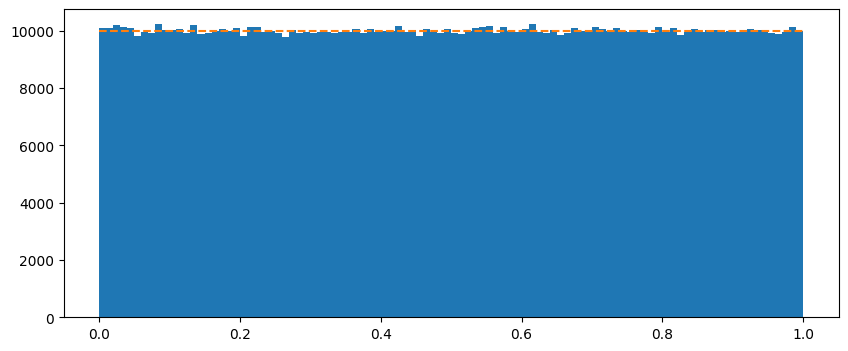

In [5]:
nbins = 100
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(seq, nbins, range=(0, 1))
avg = float(num)/nbins
ax.plot((0, 1),(avg, avg), '--')
plt.show()

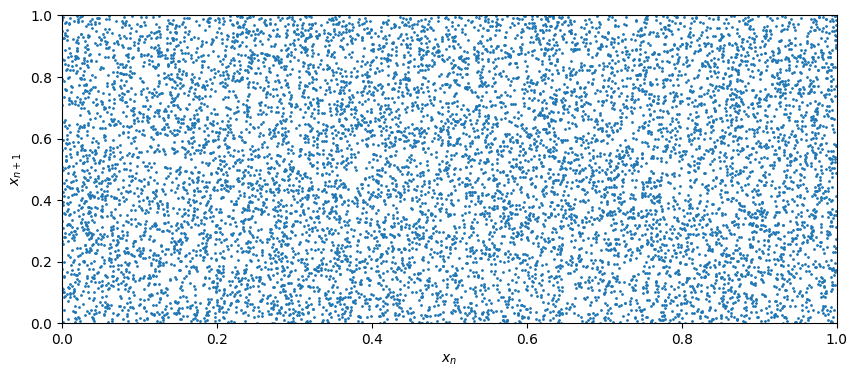

In [6]:
def plot2d(a=0x5DEECE66D, c=0xB):
    px = []
    py = []
    x = 1234
    num = 10000
    for i in range(num):
        px.append(x/max_rnd)
        x = rand48(x, a, c)
        py.append(x/max_rnd)
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_xlabel(r'$x_{n}$')
    ax.set_ylabel(r'$x_{n+1}$')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.plot(px, py, marker=".", markersize=2, linestyle='')
plot2d()

Per valori piccoli dei parametri la sequenza diventa periodica, e presenta schemi ripetitivi, quindi poco utile.

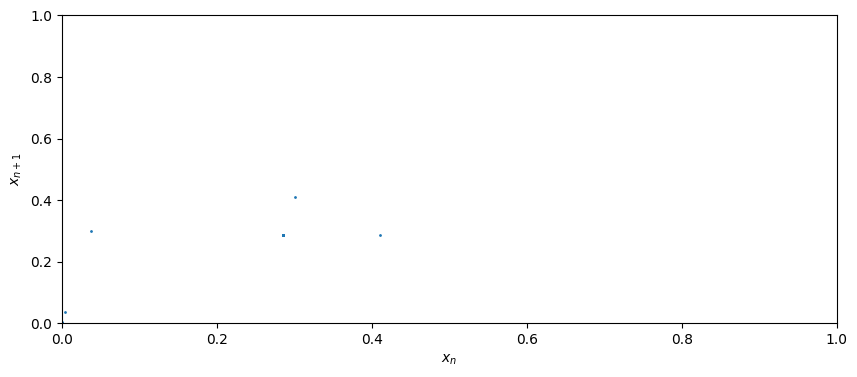

In [7]:
plot2d(a=8, c=2)

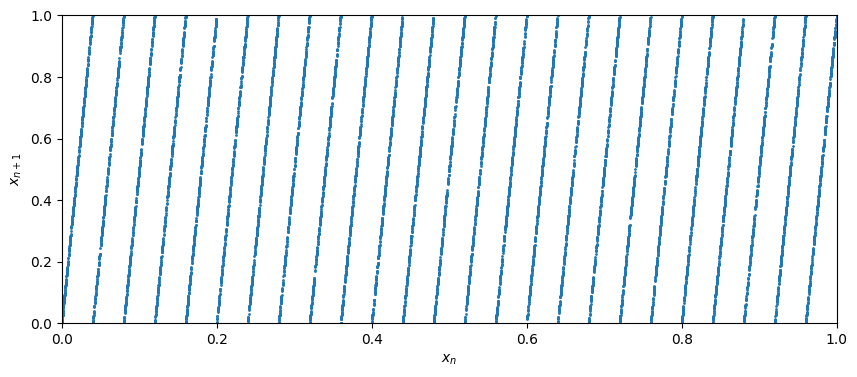

In [8]:
plot2d(a=25, c=3)

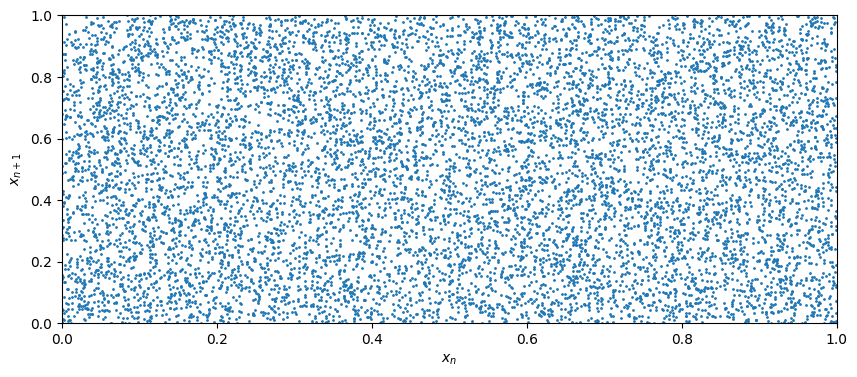

In [9]:
plot2d(a=657, c=31)

Rispetto alla mappa logistica $x_{n+1}=rx_n(1-x_n)$, la non linearità è ottenuta dall'operatore *modulo* che riporta il valore $ax_n+c$ entro i limiti di macchina con la quale può essere rappresentato un numero intero.

Si risparmia quindi una moltiplicazione, e non è necessario scartare i primi numeri casuali estratti, rendendo più efficiente l'algoritmo.

Ma il risultato di questo algoritmo è decisametne meno appariscente della mappa logistica.

## Periodo

Trattandosi di sequenze di numeri interi, inevitabilmente prima o poi la sequenza si ripeterà. Il numero massimo di valori generati prima che la sequenza si ripeta si chiama **periodo** del generatore di numeri (pseudo)casuale.